In [4]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
import cv2
import glob
from xml.etree import ElementTree
from os import walk
import os

from tensorflow.keras.layers import Embedding, Dense, Input, Dropout, LSTM, Activation, Conv2D, Reshape, Average, Bidirectional

In [5]:
print('Tensorflow Version: {}'.format(tf.__version__))
print('Keras Version: {}'.format(keras.__version__))

Tensorflow Version: 2.6.1
Keras Version: 2.6.0


In [6]:
annotations_directory = './annotations/'
images_directory = './images/'

In [7]:
annotations_files = []
images_files = []
for (dirpath, dirnames, filenames) in walk('./annotations'):
  annotations_files.extend(filenames)

for (dirpath, dirnames, filenames) in walk('./images'):
  images_files.extend(filenames)
print(images_files)

['maksssksksss0.png', 'maksssksksss1.png', 'maksssksksss10.png', 'maksssksksss100.png', 'maksssksksss101.png', 'maksssksksss102.png', 'maksssksksss103.png', 'maksssksksss104.png', 'maksssksksss105.png', 'maksssksksss106.png', 'maksssksksss107.png', 'maksssksksss108.png', 'maksssksksss109.png', 'maksssksksss11.png', 'maksssksksss110.png', 'maksssksksss111.png', 'maksssksksss112.png', 'maksssksksss113.png', 'maksssksksss114.png', 'maksssksksss115.png', 'maksssksksss116.png', 'maksssksksss117.png', 'maksssksksss118.png', 'maksssksksss119.png', 'maksssksksss12.png', 'maksssksksss120.png', 'maksssksksss121.png', 'maksssksksss122.png', 'maksssksksss123.png', 'maksssksksss124.png', 'maksssksksss125.png', 'maksssksksss126.png', 'maksssksksss127.png', 'maksssksksss128.png', 'maksssksksss129.png', 'maksssksksss13.png', 'maksssksksss130.png', 'maksssksksss131.png', 'maksssksksss132.png', 'maksssksksss133.png', 'maksssksksss134.png', 'maksssksksss135.png', 'maksssksksss136.png', 'maksssksksss137.p

In [8]:
len(annotations_files), len(images_files)

(853, 853)

In [9]:
information = {'xmin': [], 'ymin': [], 'xmax': [], 'ymax': [], 'label': [], 'file': [], 'width': [], 'height': []}

for annotation in glob.glob(annotations_directory + '/*.xml'):
  tree = ElementTree.parse(annotation)
    
  for element in tree.iter():
    if 'size' in element.tag:
      for attribute in list(element):
        if 'width' in attribute.tag: 
          width = int(round(float(attribute.text)))
        if 'height' in attribute.tag:
          height = int(round(float(attribute.text)))    

    if 'object' in element.tag:
      for attribute in list(element):
          
        if 'name' in attribute.tag:
          name = attribute.text                 
          information['label'] += [name]
          information['width'] += [width]
          information['height'] += [height] 
          information['file'] += [annotation.split('\\')[-1][0:-4]] 
                    
        if 'bndbox' in attribute.tag:
          for dimension in list(attribute):
            if 'xmin' in dimension.tag:
              xmin = int(round(float(dimension.text)))
              information['xmin'] += [xmin]
            if 'ymin' in dimension.tag:
              ymin = int(round(float(dimension.text)))
              information['ymin'] += [ymin]                                
            if 'xmax' in dimension.tag:
              xmax = int(round(float(dimension.text)))
              information['xmax'] += [xmax]                                
            if 'ymax' in dimension.tag:
              ymax = int(round(float(dimension.text)))
              information['ymax'] += [ymax]

In [10]:
annotations_info_df = pd.DataFrame(information)
annotations_info_df.head(10)

,xmin,ymin,xmax,ymax,label,file,width,height
0,79,105,109,142,without_mask,maksssksksss0,512,366
1,185,100,226,144,with_mask,maksssksksss0,512,366
2,325,90,360,141,without_mask,maksssksksss0,512,366
3,321,34,354,69,with_mask,maksssksksss1,400,156
4,224,38,261,73,with_mask,maksssksksss1,400,156
5,299,58,315,81,with_mask,maksssksksss1,400,156
6,143,74,174,115,with_mask,maksssksksss1,400,156
7,74,69,95,99,with_mask,maksssksksss1,400,156
8,191,67,221,93,with_mask,maksssksksss1,400,156
9,21,73,44,93,with_mask,maksssksksss1,400,156


In [11]:
# Add Annotation and Image File Names
annotations_info_df['annotation_file'] = annotations_info_df['file'] + '.xml'
annotations_info_df['image_file'] = annotations_info_df['file'] + '.png'

# Tidy Grammatical Issue
annotations_info_df.loc[annotations_info_df['label'] == 'mask_weared_incorrect', 'label'] = 'mask_incorrectly_worn'

In [12]:
annotations_info_df

,xmin,ymin,xmax,ymax,label,file,width,height,annotation_file,image_file
0,79,105,109,142,without_mask,maksssksksss0,512,366,maksssksksss0.xml,maksssksksss0.png
1,185,100,226,144,with_mask,maksssksksss0,512,366,maksssksksss0.xml,maksssksksss0.png
2,325,90,360,141,without_mask,maksssksksss0,512,366,maksssksksss0.xml,maksssksksss0.png
3,321,34,354,69,with_mask,maksssksksss1,400,156,maksssksksss1.xml,maksssksksss1.png
4,224,38,261,73,with_mask,maksssksksss1,400,156,maksssksksss1.xml,maksssksksss1.png
...,...,...,...,...,...,...,...,...,...,...
4067,263,62,287,85,with_mask,maksssksksss98,400,267,maksssksksss98.xml,maksssksksss98.png
4068,344,80,377,106,with_mask,maksssksksss98,400,267,maksssksksss98.xml,maksssksksss98.png
4069,181,54,273,162,mask_incorrectly_worn,maksssksksss99,400,267,maksssksksss99.xml,maksssksksss99.png
4070,99,87,176,165,with_mask,maksssksksss99,400,267,maksssksksss99.xml,maksssksksss99.png


In [13]:
# Function to Show Actual Image
def render_image(image):
    plt.figure()
    plt.imshow(image)
    plt.show()
    
# Function to Convert BGR to RGB
def convert_to_RGB(image):
    return cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

In [14]:
# Image 737 File Name
annotations_info_df['image_file'].iloc[0]

'maksssksksss0.png'

In [15]:
# Image 737 File Path
image_737_path = './images/' + annotations_info_df['image_file'].iloc[0]
image_737_path

'./images/maksssksksss0.png'

In [16]:
image_737 = cv2.imread(image_737_path)
print(image_737)

[[[116 111 113]
  [113 108 110]
  [101  96  98]
  ...
  [102  59  40]
  [157  98  72]
  [186 116  86]]

 [[106 100 105]
  [100  97  99]
  [ 89  86  88]
  ...
  [ 98  58  39]
  [129  73  48]
  [173 109  79]]

 [[ 93  92  96]
  [ 88  87  91]
  [ 80  79  83]
  ...
  [ 90  57  38]
  [105  57  31]
  [157 100  71]]

 ...

 [[ 88  83  85]
  [ 90  85  87]
  [ 92  89  91]
  ...
  [ 32  27  28]
  [ 32  27  28]
  [ 33  28  29]]

 [[ 89  84  86]
  [ 92  87  89]
  [ 95  90  92]
  ...
  [ 33  28  29]
  [ 33  28  29]
  [ 34  29  30]]

 [[ 96  91  93]
  [ 99  94  96]
  [103  98 100]
  ...
  [ 34  29  30]
  [ 34  29  30]
  [ 35  30  31]]]


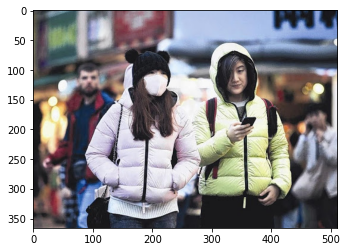

In [17]:
# Display The Image in RGB
render_image(convert_to_RGB(image_737))

In [18]:
# Image 737 Annotation
annotation_737_path = './annotations/' + annotations_info_df['annotation_file'].iloc[0]
annotation_737_path

'./annotations/maksssksksss0.xml'

In [19]:
# Shape of Image 737
image_737.shape

(366, 512, 3)

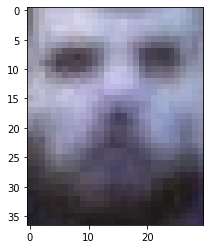

In [20]:
x = annotations_info_df['xmin'].iloc[0]
y = annotations_info_df['ymin'].iloc[0]
width = annotations_info_df['xmax'].iloc[0]
height = annotations_info_df['ymax'].iloc[0]

cropped_737 = image_737[y:height, x:width]
render_image(cropped_737)

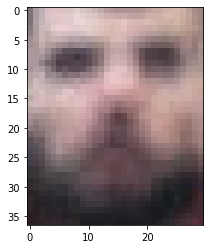

In [21]:
render_image(convert_to_RGB(cropped_737))

In [22]:
len(annotations_info_df)

4072

In [23]:
annotations_info_df.head(10)

,xmin,ymin,xmax,ymax,label,file,width,height,annotation_file,image_file
0,79,105,109,142,without_mask,maksssksksss0,512,366,maksssksksss0.xml,maksssksksss0.png
1,185,100,226,144,with_mask,maksssksksss0,512,366,maksssksksss0.xml,maksssksksss0.png
2,325,90,360,141,without_mask,maksssksksss0,512,366,maksssksksss0.xml,maksssksksss0.png
3,321,34,354,69,with_mask,maksssksksss1,400,156,maksssksksss1.xml,maksssksksss1.png
4,224,38,261,73,with_mask,maksssksksss1,400,156,maksssksksss1.xml,maksssksksss1.png
5,299,58,315,81,with_mask,maksssksksss1,400,156,maksssksksss1.xml,maksssksksss1.png
6,143,74,174,115,with_mask,maksssksksss1,400,156,maksssksksss1.xml,maksssksksss1.png
7,74,69,95,99,with_mask,maksssksksss1,400,156,maksssksksss1.xml,maksssksksss1.png
8,191,67,221,93,with_mask,maksssksksss1,400,156,maksssksksss1.xml,maksssksksss1.png
9,21,73,44,93,with_mask,maksssksksss1,400,156,maksssksksss1.xml,maksssksksss1.png


In [24]:
path = './cropped_images'
#os.mkdir(path)

In [25]:
# Copy The File Name (Before appending with .png extension)
annotations_info_df['cropped_image_file'] = annotations_info_df['file']
annotations_info_df

,xmin,ymin,xmax,ymax,label,file,width,height,annotation_file,image_file,cropped_image_file
0,79,105,109,142,without_mask,maksssksksss0,512,366,maksssksksss0.xml,maksssksksss0.png,maksssksksss0
1,185,100,226,144,with_mask,maksssksksss0,512,366,maksssksksss0.xml,maksssksksss0.png,maksssksksss0
2,325,90,360,141,without_mask,maksssksksss0,512,366,maksssksksss0.xml,maksssksksss0.png,maksssksksss0
3,321,34,354,69,with_mask,maksssksksss1,400,156,maksssksksss1.xml,maksssksksss1.png,maksssksksss1
4,224,38,261,73,with_mask,maksssksksss1,400,156,maksssksksss1.xml,maksssksksss1.png,maksssksksss1
...,...,...,...,...,...,...,...,...,...,...,...
4067,263,62,287,85,with_mask,maksssksksss98,400,267,maksssksksss98.xml,maksssksksss98.png,maksssksksss98
4068,344,80,377,106,with_mask,maksssksksss98,400,267,maksssksksss98.xml,maksssksksss98.png,maksssksksss98
4069,181,54,273,162,mask_incorrectly_worn,maksssksksss99,400,267,maksssksksss99.xml,maksssksksss99.png,maksssksksss99
4070,99,87,176,165,with_mask,maksssksksss99,400,267,maksssksksss99.xml,maksssksksss99.png,maksssksksss99


In [26]:
for i in range(len(annotations_info_df)):
    # Get The File Path and Read The Image
    image_filepath = './images/' + annotations_info_df['image_file'].iloc[i]
    image = cv2.imread(image_filepath)
    
    # Set The Cropped Image File Name
    annotations_info_df['cropped_image_file'].iloc[i] = annotations_info_df['cropped_image_file'].iloc[i] + '-' + str(i) + '.png'
    cropped_image_filename = annotations_info_df['cropped_image_file'].iloc[i]
    
    # Get The xmin, ymin, xmax, ymax Value (Bounding Box) to Crop Image
    xmin = annotations_info_df['xmin'].iloc[i]
    ymin = annotations_info_df['ymin'].iloc[i]
    xmax = annotations_info_df['xmax'].iloc[i]
    ymax = annotations_info_df['ymax'].iloc[i]

    # Crop The Image Based on The Values Aboveannotations_info_df
    cropped_image = image[ymin:ymax, xmin:xmax]
    
    # Save Cropped Image
    cropped_image_directory = os.path.join('./cropped_images', cropped_image_filename) 
    cv2.imwrite(cropped_image_directory, cropped_image)

E:\Program_Files\Anaconda\envs\cs682\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [27]:
annotations_info_df

,xmin,ymin,xmax,ymax,label,file,width,height,annotation_file,image_file,cropped_image_file
0,79,105,109,142,without_mask,maksssksksss0,512,366,maksssksksss0.xml,maksssksksss0.png,maksssksksss0-0.png
1,185,100,226,144,with_mask,maksssksksss0,512,366,maksssksksss0.xml,maksssksksss0.png,maksssksksss0-1.png
2,325,90,360,141,without_mask,maksssksksss0,512,366,maksssksksss0.xml,maksssksksss0.png,maksssksksss0-2.png
3,321,34,354,69,with_mask,maksssksksss1,400,156,maksssksksss1.xml,maksssksksss1.png,maksssksksss1-3.png
4,224,38,261,73,with_mask,maksssksksss1,400,156,maksssksksss1.xml,maksssksksss1.png,maksssksksss1-4.png
...,...,...,...,...,...,...,...,...,...,...,...
4067,263,62,287,85,with_mask,maksssksksss98,400,267,maksssksksss98.xml,maksssksksss98.png,maksssksksss98-4067.png
4068,344,80,377,106,with_mask,maksssksksss98,400,267,maksssksksss98.xml,maksssksksss98.png,maksssksksss98-4068.png
4069,181,54,273,162,mask_incorrectly_worn,maksssksksss99,400,267,maksssksksss99.xml,maksssksksss99.png,maksssksksss99-4069.png
4070,99,87,176,165,with_mask,maksssksksss99,400,267,maksssksksss99.xml,maksssksksss99.png,maksssksksss99-4070.png


In [28]:
cropped_images_files = !ls './cropped_images'
cropped_images_files[:10]

["'ls' is not recognized as an internal or external command,",
 'operable program or batch file.']

In [29]:
print('There are {} cropped images in total.'.format(len(cropped_images_files)))

There are 2 cropped images in total.


In [30]:
# Image 737 File Name
annotations_info_df['cropped_image_file'].iloc[0]

'maksssksksss0-0.png'

In [31]:
# Image 737 File Path
cropped_737_0_path = './cropped_images/' + annotations_info_df['cropped_image_file'].iloc[0]
cropped_737_0_path

'./cropped_images/maksssksksss0-0.png'

In [32]:
'./cropped_images/maksssksksss737-0.png'

'./cropped_images/maksssksksss737-0.png'

In [33]:
# Read Image 737 Using It's Path
cropped_737_0 = cv2.imread(cropped_737_0_path)
cropped_737_0

array([[[122, 113, 126],
        [162, 157, 172],
        [181, 175, 194],
        ...,
        [152, 159, 186],
        [137, 141, 166],
        [133, 133, 157]],

       [[121, 115, 126],
        [160, 156, 168],
        [180, 177, 193],
        ...,
        [153, 164, 192],
        [138, 145, 172],
        [132, 137, 160]],

       [[120, 114, 125],
        [161, 159, 171],
        [181, 180, 196],
        ...,
        [146, 160, 188],
        [132, 143, 170],
        [129, 135, 158]],

       ...,

       [[ 38,  38,  46],
        [ 33,  31,  37],
        [ 40,  38,  44],
        ...,
        [ 41,  36,  51],
        [ 44,  39,  60],
        [ 49,  42,  69]],

       [[ 30,  29,  39],
        [ 33,  33,  41],
        [ 42,  39,  48],
        ...,
        [ 51,  45,  64],
        [ 51,  45,  70],
        [ 50,  42,  73]],

       [[ 34,  31,  47],
        [ 35,  34,  44],
        [ 39,  35,  47],
        ...,
        [ 58,  50,  73],
        [ 61,  50,  82],
        [ 53,  42,  82]]

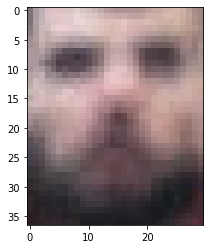

In [34]:
# Display Image 737 in RGB
render_image(convert_to_RGB(cropped_737_0))

In [35]:
# Sample Cropped Image Shape
cropped_737_0.shape

(37, 30, 3)

In [36]:
# Data Splitting
test_df = annotations_info_df[:800]
train_df = annotations_info_df[800:]

# Check The Shape of Splitted Data (Train and Test)
train_df.shape, test_df.shape

((3272, 11), (800, 11))

In [37]:
# Glimpse of Train Data
train_df.head()

,xmin,ymin,xmax,ymax,label,file,width,height,annotation_file,image_file,cropped_image_file
800,226,86,238,98,without_mask,maksssksksss253,400,300,maksssksksss253.xml,maksssksksss253.png,maksssksksss253-800.png
801,155,83,172,103,without_mask,maksssksksss253,400,300,maksssksksss253.xml,maksssksksss253.png,maksssksksss253-801.png
802,32,57,49,89,without_mask,maksssksksss253,400,300,maksssksksss253.xml,maksssksksss253.png,maksssksksss253-802.png
803,385,77,400,93,without_mask,maksssksksss253,400,300,maksssksksss253.xml,maksssksksss253.png,maksssksksss253-803.png
804,17,42,55,85,without_mask,maksssksksss254,400,217,maksssksksss254.xml,maksssksksss254.png,maksssksksss254-804.png


In [38]:
# Number of Categories / Labels
classes = list(train_df['label'].unique())

In [39]:
train_df

,xmin,ymin,xmax,ymax,label,file,width,height,annotation_file,image_file,cropped_image_file
800,226,86,238,98,without_mask,maksssksksss253,400,300,maksssksksss253.xml,maksssksksss253.png,maksssksksss253-800.png
801,155,83,172,103,without_mask,maksssksksss253,400,300,maksssksksss253.xml,maksssksksss253.png,maksssksksss253-801.png
802,32,57,49,89,without_mask,maksssksksss253,400,300,maksssksksss253.xml,maksssksksss253.png,maksssksksss253-802.png
803,385,77,400,93,without_mask,maksssksksss253,400,300,maksssksksss253.xml,maksssksksss253.png,maksssksksss253-803.png
804,17,42,55,85,without_mask,maksssksksss254,400,217,maksssksksss254.xml,maksssksksss254.png,maksssksksss254-804.png
...,...,...,...,...,...,...,...,...,...,...,...
4067,263,62,287,85,with_mask,maksssksksss98,400,267,maksssksksss98.xml,maksssksksss98.png,maksssksksss98-4067.png
4068,344,80,377,106,with_mask,maksssksksss98,400,267,maksssksksss98.xml,maksssksksss98.png,maksssksksss98-4068.png
4069,181,54,273,162,mask_incorrectly_worn,maksssksksss99,400,267,maksssksksss99.xml,maksssksksss99.png,maksssksksss99-4069.png
4070,99,87,176,165,with_mask,maksssksksss99,400,267,maksssksksss99.xml,maksssksksss99.png,maksssksksss99-4070.png


In [40]:
train_df[train_df['file'] == 'maksssksksss543']['label'].unique()

array(['without_mask'], dtype=object)

In [41]:
image_139_path = './images/maksssksksss139.png'
image_139 = cv2.imread(image_139_path)
image_543_path = './images/maksssksksss543.png'
image_543 = cv2.imread(image_543_path)

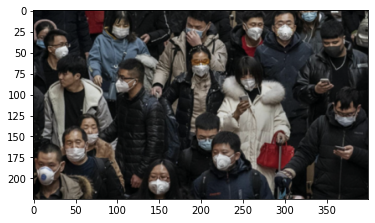

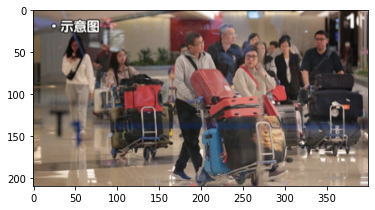

In [42]:
image_139_rgb = convert_to_RGB(image_139)
render_image(image_139_rgb)
image_543_rgb = convert_to_RGB(image_543)
render_image(image_543_rgb)

In [43]:
train_df['file'].head(10)

800    maksssksksss253
801    maksssksksss253
802    maksssksksss253
803    maksssksksss253
804    maksssksksss254
805    maksssksksss254
806    maksssksksss254
807    maksssksksss254
808    maksssksksss254
809    maksssksksss254
Name: file, dtype: object

In [44]:
image_543_df = train_df[train_df['file'] == 'maksssksksss543']
image_543_df

,xmin,ymin,xmax,ymax,label,file,width,height,annotation_file,image_file,cropped_image_file
2396,46,39,56,50,without_mask,maksssksksss543,400,210,maksssksksss543.xml,maksssksksss543.png,maksssksksss543-2396.png
2397,101,50,112,63,without_mask,maksssksksss543,400,210,maksssksksss543.xml,maksssksksss543.png,maksssksksss543-2397.png
2398,194,34,205,51,without_mask,maksssksksss543,400,210,maksssksksss543.xml,maksssksksss543.png,maksssksksss543-2398.png
2399,230,24,243,41,without_mask,maksssksksss543,400,210,maksssksksss543.xml,maksssksksss543.png,maksssksksss543-2399.png
2400,252,51,270,69,without_mask,maksssksksss543,400,210,maksssksksss543.xml,maksssksksss543.png,maksssksksss543-2400.png
2401,295,40,306,50,without_mask,maksssksksss543,400,210,maksssksksss543.xml,maksssksksss543.png,maksssksksss543-2401.png
2402,282,42,291,52,without_mask,maksssksksss543,400,210,maksssksksss543.xml,maksssksksss543.png,maksssksksss543-2402.png
2403,267,42,278,55,without_mask,maksssksksss543,400,210,maksssksksss543.xml,maksssksksss543.png,maksssksksss543-2403.png
2404,259,32,269,42,without_mask,maksssksksss543,400,210,maksssksksss543.xml,maksssksksss543.png,maksssksksss543-2404.png
2405,337,31,350,46,without_mask,maksssksksss543,400,210,maksssksksss543.xml,maksssksksss543.png,maksssksksss543-2405.png


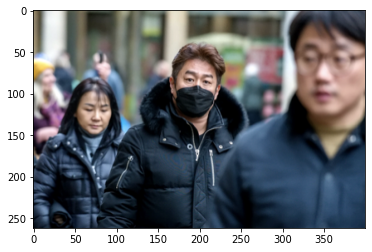

In [45]:
image_244_path = './images/maksssksksss244.png'
image_244 = cv2.imread(image_244_path)
image_244_rgb = convert_to_RGB(image_244)
render_image(image_244_rgb)
image_244_df = train_df[train_df['file'] == 'maksssksksss244']

In [46]:
with_mask_list, without_mask_list, incorrectly_worn_list = [], [], []
for i in range(len(image_244_df)):
    bounding_box = [image_244_df['xmin'].iloc[i], image_244_df['ymin'].iloc[i],
                    image_244_df['xmax'].iloc[i], image_244_df['ymax'].iloc[i]]
    if image_244_df['label'].iloc[i] == 'with_mask':
        with_mask_list.append(bounding_box)
    elif image_244_df['label'].iloc[i] == 'without_mask':
        without_mask_list.append(bounding_box)
    else:
        incorrectly_worn_list.append(bounding_box)
        
found_objects_dict = {'With Mask': with_mask_list, 
                      'Without Mask': without_mask_list, 
                      'Incorrectly Worn': incorrectly_worn_list}
found_objects_dict

{'With Mask': [], 'Without Mask': [], 'Incorrectly Worn': []}

In [47]:
found_objects_dict

{'With Mask': [], 'Without Mask': [], 'Incorrectly Worn': []}

In [48]:
for key, value in found_objects_dict.items():
    for i in range(len(value)):
        color = (0, 255, 0) # green
        text = 'Mask'
        if key == 'Without Mask':
            color = (255, 0, 0) # red
            text = 'No Mask'
        elif key == 'Incorrectly Worn':
            color = (255, 255, 0) # yellow
            text = 'Incorrect'
        start_point = (value[i][0], value[i][1])
        end_point = (value[i][2], value[i][3])
        cv2.rectangle(image_244_rgb, start_point, end_point, color = color, thickness = 2)
        cv2.putText(image_244_rgb, org = (value[i][0] - 8, value[i][1] - 3), text = text, 
                    fontFace = cv2.FONT_HERSHEY_SIMPLEX, fontScale = 0.5, color = color)

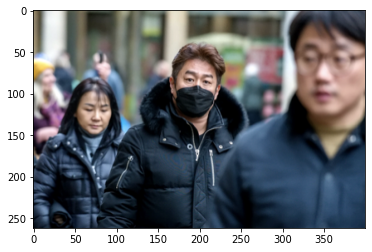

In [49]:
render_image(image_244_rgb)

In [50]:
# Count Occurence of Labels
train_df['label'].value_counts()

with_mask                2651
without_mask              521
mask_incorrectly_worn     100
Name: label, dtype: int64

In [51]:
sorted_label_df = pd.DataFrame(train_df['label'].value_counts()).reset_index()
sorted_label_df.rename(columns = {'index': 'label', 'label': 'count'}, inplace = True)
sorted_label_df

,label,count
0,with_mask,2651
1,without_mask,521
2,mask_incorrectly_worn,100


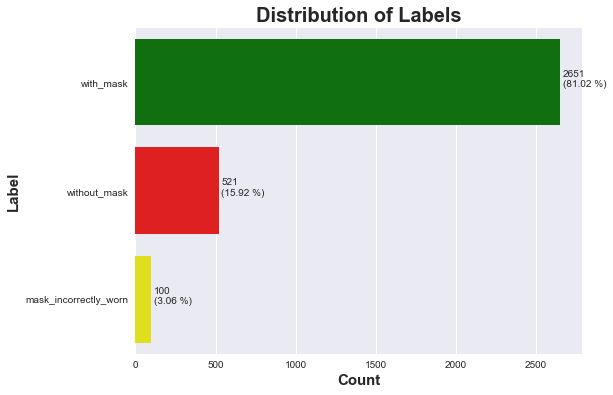

In [52]:
plt.style.use('seaborn')
plt.figure(figsize = (8, 6))
barplot = sns.barplot(x = 'count', y = 'label', data = sorted_label_df, orient = 'horizontal', 
                      palette = ['green', 'red', 'yellow'])
plt.title('Distribution of Labels', fontsize = 20, fontweight = 'bold')
plt.xlabel('Count', fontsize = 15, fontweight = 'bold')
plt.ylabel('Label', fontsize = 15, fontweight = 'bold')

for p in barplot.patches:
    width = p.get_width()
    percentage = round(width * 100 / sum(sorted_label_df['count']), 2)
    plt.text(x = width + 15, y = p.get_y() + 0.55 * p.get_height(), s = f'{int(width)}\n({percentage} %)')

plt.show()

In [53]:
cropped_image_path = './cropped_images/' + train_df['cropped_image_file'].iloc[0]
cropped_image = cv2.imread(cropped_image_path)
cropped_image.shape

(12, 12, 3)

In [54]:
cropped_image.shape[0]

12

In [62]:
image_width = []
image_height = []
for i in range(len(train_df)):
    cropped_image_path = './cropped_images/' + train_df['cropped_image_file'].iloc[i]
    cropped_image = cv2.imread(cropped_image_path)
    image_width.append(cropped_image.shape[0])
    image_height.append(cropped_image.shape[1])

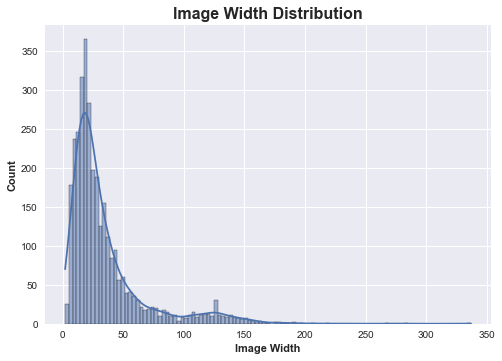

In [63]:
sns.histplot(image_width, kde = True)
plt.title('Image Width Distribution', fontsize = 16, fontweight = 'bold')
plt.xlabel('Image Width', fontweight = 'bold')
plt.ylabel('Count', fontweight = 'bold')
plt.show()

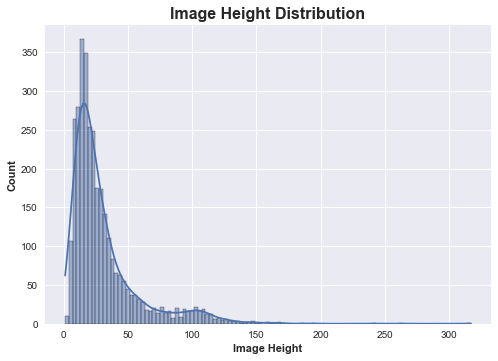

In [64]:
sns.histplot(image_height, kde = True)
plt.title('Image Height Distribution', fontsize = 16, fontweight = 'bold')
plt.xlabel('Image Height', fontweight = 'bold')
plt.ylabel('Count', fontweight = 'bold')
plt.show()

In [65]:
print('IMAGE WIDTH')
print(f'Min: {min(image_width)}')
print(f'Max: {max(image_width)}')
print(f'Mean: {np.mean(image_width)}')
print(f'Median: {np.median(image_width)}')
print('IMAGE HEIGHT')
print(f'Min: {min(image_height)}')
print(f'Max: {max(image_height)}')
print(f'Mean: {np.mean(image_height)}')
print(f'Median: {np.median(image_height)}')

IMAGE WIDTH
Min: 2
Max: 337
Mean: 34.65739608801956
Median: 23.0
IMAGE HEIGHT
Min: 1
Max: 317
Mean: 30.802261613691932
Median: 22.0


In [66]:
image_target_size = (int(np.median(image_width)), int(np.median(image_height)))
image_target_size

(23, 22)

In [67]:
from keras_preprocessing.image import ImageDataGenerator

train_image_generator = ImageDataGenerator(rescale = 1. / 255., validation_split = 0.25)

train_generator = train_image_generator.flow_from_dataframe(
    dataframe = train_df,
    directory = './cropped_images',
    x_col = 'cropped_image_file',
    y_col = 'label',
    subset = 'training',
    batch_size = 32,
    seed = 42,
    shuffle = True,
    class_mode = 'categorical',
    target_size = image_target_size
)

valid_generator = train_image_generator.flow_from_dataframe(
    dataframe = train_df,
    directory = './cropped_images',
    x_col = 'cropped_image_file',
    y_col = 'label',
    subset = 'validation',
    batch_size = 32,
    seed = 42,
    shuffle = True,
    class_mode = 'categorical',
    target_size = image_target_size
)

Found 2454 validated image filenames belonging to 3 classes.
Found 818 validated image filenames belonging to 3 classes.


In [68]:
test_image_generator = ImageDataGenerator(rescale = 1. / 255.)

test_generator = train_image_generator.flow_from_dataframe(
    dataframe = test_df,
    directory = './cropped_images',
    x_col = 'cropped_image_file',
    y_col = 'label',
    batch_size = 32,
    seed = 42,
    shuffle = True,
    class_mode = 'categorical',
    target_size = image_target_size
)

Found 800 validated image filenames belonging to 3 classes.


In [ ]:
print(train_generator)
print(valid_generator)
print(test_generator)

In [69]:
input_shape = [int(np.median(image_width)), int(np.median(image_height)), 3]

In [68]:
model_1 = keras.models.Sequential([
    keras.layers.Conv2D(filters = 10, kernel_size = 3, activation = 'relu',
                        input_shape = input_shape),
    keras.layers.Conv2D(filters = 10, kernel_size = 3, activation = 'relu'),
    keras.layers.MaxPool2D(pool_size = 2, padding = 'valid'),
    keras.layers.Conv2D(filters = 10, kernel_size = 3, activation = 'relu'),
    keras.layers.Conv2D(filters = 10, kernel_size = 3, activation = 'relu'),
    keras.layers.MaxPool2D(pool_size = 2, padding = 'valid'),
    keras.layers.Flatten(),
    keras.layers.Dense(units = len(classes), activation = 'softmax')
])

In [69]:
model_1.compile(loss = 'categorical_crossentropy',
                optimizer = keras.optimizers.Adam(),
                metrics = ['accuracy', keras.metrics.Recall()])

history_1 = model_1.fit(train_generator, epochs = 10, steps_per_epoch = len(train_generator), 
                        validation_data = valid_generator, validation_steps = len(valid_generator))

Epoch 1/10
77/77 [==============================] - 2s 20ms/step - loss: 0.5656 - accuracy: 0.7983 - recall: 0.7148 - val_loss: 0.3940 - val_accuracy: 0.8215 - val_recall: 0.7873
Epoch 2/10
77/77 [==============================] - 1s 17ms/step - loss: 0.3141 - accuracy: 0.8973 - recall: 0.8765 - val_loss: 0.3355 - val_accuracy: 0.9022 - val_recall: 0.8936
Epoch 3/10
77/77 [==============================] - 1s 17ms/step - loss: 0.2576 - accuracy: 0.9193 - recall: 0.9108 - val_loss: 0.2374 - val_accuracy: 0.9315 - val_recall: 0.9303
Epoch 4/10
77/77 [==============================] - 1s 17ms/step - loss: 0.2194 - accuracy: 0.9348 - recall: 0.9287 - val_loss: 0.2418 - val_accuracy: 0.9205 - val_recall: 0.9169
Epoch 5/10
77/77 [==============================] - 1s 17ms/step - loss: 0.2028 - accuracy: 0.9389 - recall: 0.9340 - val_loss: 0.2498 - val_accuracy: 0.9230 - val_recall: 0.9181
Epoch 6/10
77/77 [==============================] - 1s 17ms/step - loss: 0.1934 - accuracy: 0.9368 - reca

In [70]:
result_1 = pd.DataFrame(history_1.history)
result_1

,loss,accuracy,recall,val_loss,val_accuracy,val_recall
0,0.565617,0.798289,0.714751,0.394042,0.821516,0.787286
1,0.314066,0.897310,0.876528,0.335460,0.902200,0.893643
2,0.257569,0.919315,0.910758,0.237379,0.931540,0.930318
3,0.219416,0.934800,0.928688,0.241783,0.920538,0.916870
4,0.202766,0.938875,0.933985,0.249798,0.922983,0.918093
5,0.193398,0.936838,0.931948,0.221488,0.927873,0.924205
6,0.186611,0.946210,0.944988,0.202987,0.936430,0.935208
7,0.189731,0.941320,0.938060,0.211101,0.931540,0.929095
8,0.176104,0.941728,0.937653,0.205348,0.932763,0.930318
9,0.173511,0.944580,0.938875,0.213670,0.940098,0.935208


<AxesSubplot:>

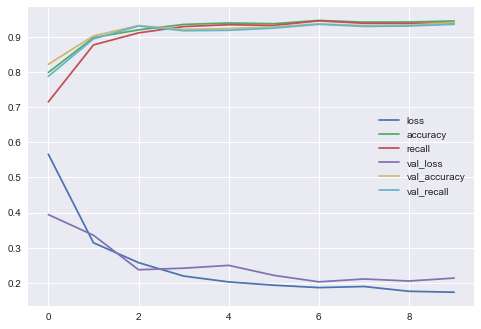

In [71]:
result_1.plot()

In [76]:
def plot_line(result, ax, col, title, train_column, valid_column):
    # Line Plot of Model Performance
    ax[col].plot(result[train_column])
    ax[col].plot(result[valid_column])
    
    # Title and Legend
    ax[col].set_title(title, fontweight = 'bold')
    ax[col].legend(['Train', 'Validation'])
    
def plot_result(result, train_recall, valid_recall):
    # Create a 1x3 Grid and Set Main Title
    fig, ax = plt.subplots(nrows = 1, ncols = 3, figsize = (17, 8))
    fig.suptitle('Model Performance', fontsize = 20, fontweight = 'bold')
    
    # Visualization of Accuracy, Recall, and Loss
    plot_line(result, ax, 0, 'Accuracy', 'accuracy', 'val_accuracy')
    plot_line(result, ax, 1, 'Recall', train_recall, valid_recall)
    plot_line(result, ax, 2, 'Loss', 'loss', 'val_loss')
    plt.show()

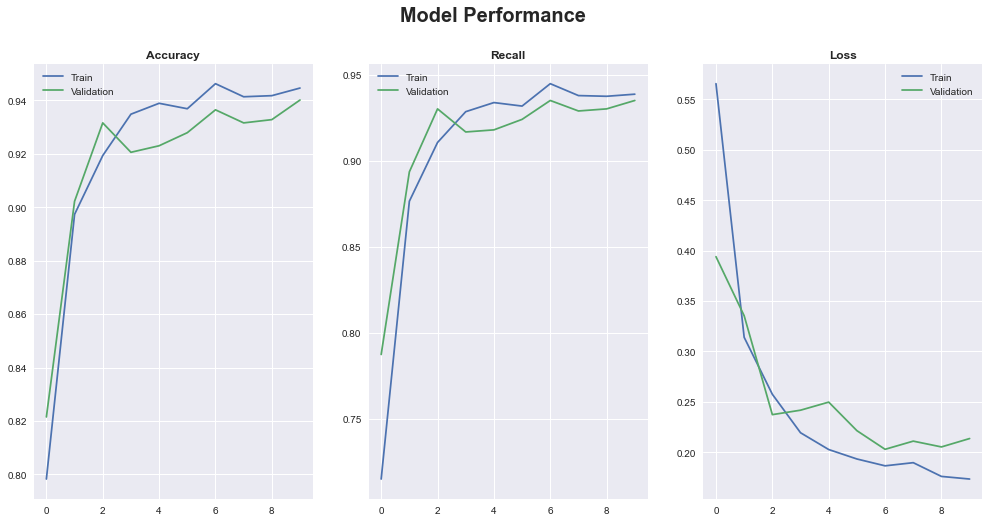

In [73]:
plot_result(result_1, 'recall', 'val_recall')

In [74]:
model_2 = keras.models.Sequential([
    keras.layers.Conv2D(filters = 10, kernel_size = 3, activation = 'relu', input_shape = input_shape),
    keras.layers.Conv2D(filters = 10, kernel_size = 3, activation = 'relu'),
    keras.layers.MaxPool2D(pool_size = 2, padding = 'valid'),
    keras.layers.Conv2D(filters = 10, kernel_size = 3, activation = 'relu'),
    keras.layerls.Conv2D(filters = 10, kernel_size = 3, activation = 'relu'),
    keras.layers.MaxPool2D(pool_size = 2, padding = 'valid'),
    keras.layers.Flatten(),
    keras.layers.Dense(units = len(classes), activation = 'softmax')
])

In [75]:
model_2.compile(loss = 'categorical_crossentropy',
                optimizer = keras.optimizers.Adam(),
                metrics = ['accuracy', keras.metrics.Recall()])

callbacks = [keras.callbacks.EarlyStopping()]

history_2 = model_2.fit(train_generator, epochs = 100, steps_per_epoch = len(train_generator), 
                        validation_data = valid_generator, validation_steps = len(valid_generator),
                        )#callbacks = callbacks)

Epoch 1/100
77/77 [==============================] - 2s 19ms/step - loss: 0.6095 - accuracy: 0.8109 - recall_1: 0.6691 - val_loss: 0.4691 - val_accuracy: 0.8081 - val_recall_1: 0.8032
Epoch 2/100
77/77 [==============================] - 1s 16ms/step - loss: 0.3940 - accuracy: 0.8464 - recall_1: 0.8170 - val_loss: 0.2984 - val_accuracy: 0.9071 - val_recall_1: 0.8961
Epoch 3/100
77/77 [==============================] - 1s 16ms/step - loss: 0.2827 - accuracy: 0.9161 - recall_1: 0.9087 - val_loss: 0.2679 - val_accuracy: 0.9242 - val_recall_1: 0.9181
Epoch 4/100
77/77 [==============================] - 1s 16ms/step - loss: 0.2573 - accuracy: 0.9156 - recall_1: 0.9083 - val_loss: 0.2567 - val_accuracy: 0.9205 - val_recall_1: 0.9144
Epoch 5/100
77/77 [==============================] - 1s 16ms/step - loss: 0.2322 - accuracy: 0.9299 - recall_1: 0.9214 - val_loss: 0.2859 - val_accuracy: 0.9083 - val_recall_1: 0.9046
Epoch 6/100
77/77 [==============================] - 1s 16ms/step - loss: 0.2222

77/77 [==============================] - 1s 16ms/step - loss: 0.0439 - accuracy: 0.9878 - recall_1: 0.9861 - val_loss: 0.2767 - val_accuracy: 0.9328 - val_recall_1: 0.9328
Epoch 90/100
77/77 [==============================] - 1s 16ms/step - loss: 0.0481 - accuracy: 0.9841 - recall_1: 0.9825 - val_loss: 0.2993 - val_accuracy: 0.9242 - val_recall_1: 0.9242
Epoch 91/100
77/77 [==============================] - 1s 16ms/step - loss: 0.0456 - accuracy: 0.9841 - recall_1: 0.9833 - val_loss: 0.3182 - val_accuracy: 0.9242 - val_recall_1: 0.9242
Epoch 92/100
77/77 [==============================] - 1s 18ms/step - loss: 0.0527 - accuracy: 0.9825 - recall_1: 0.9813 - val_loss: 0.3277 - val_accuracy: 0.9254 - val_recall_1: 0.9242
Epoch 93/100
77/77 [==============================] - 1s 16ms/step - loss: 0.0490 - accuracy: 0.9829 - recall_1: 0.9829 - val_loss: 0.2770 - val_accuracy: 0.9254 - val_recall_1: 0.9254
Epoch 94/100
77/77 [==============================] - 1s 17ms/step - loss: 0.0484 - accu

In [76]:
result_2 = pd.DataFrame(history_2.history)
result_2

,loss,accuracy,recall_1,val_loss,val_accuracy,val_recall_1
0,0.609498,0.810921,0.669112,0.469063,0.808068,0.803178
1,0.394049,0.846373,0.817033,0.298401,0.907090,0.896088
2,0.282732,0.916055,0.908720,0.267876,0.924205,0.918093
3,0.257276,0.915648,0.908313,0.256681,0.920538,0.914425
4,0.232184,0.929910,0.921353,0.285917,0.908313,0.904646
...,...,...,...,...,...,...
95,0.044908,0.985738,0.984923,0.266584,0.943765,0.943765
96,0.042834,0.986960,0.985330,0.267121,0.933985,0.931540
97,0.044859,0.986960,0.985738,0.331028,0.929095,0.929095
98,0.037223,0.986960,0.986145,0.309969,0.932763,0.932763


<AxesSubplot:>

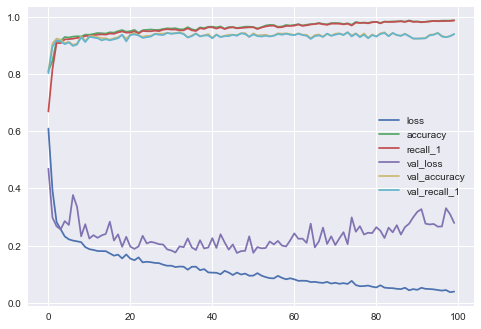

In [77]:
result_2.plot()

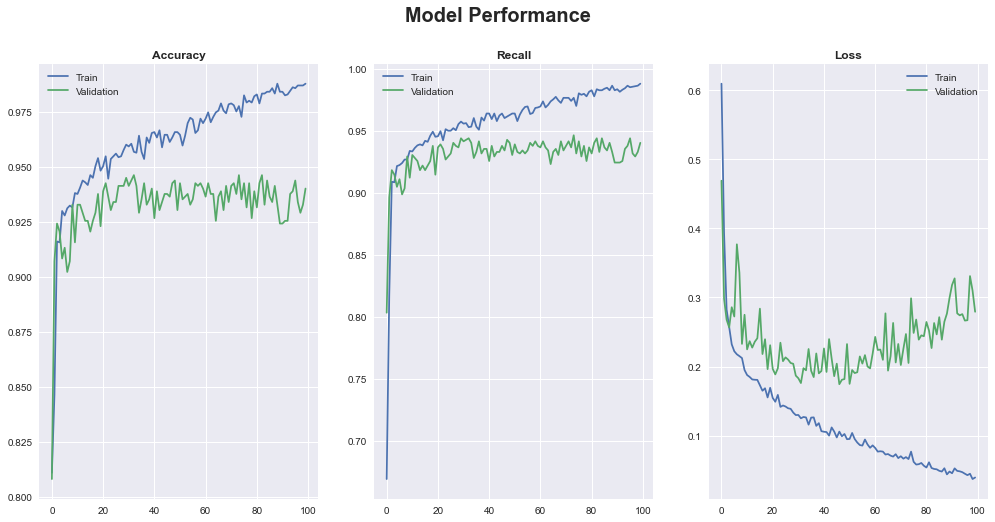

In [82]:
plot_result(result_2, 'recall_1', 'val_recall_1')

In [57]:
from tensorflow.keras.layers import LeakyReLU, BatchNormalization

In [80]:
model_3 = keras.models.Sequential([
    #0-4:
    keras.layers.Conv2D(filters = 32, kernel_size = 3, strides = 1, activation = LeakyReLU(), input_shape = input_shape),
    BatchNormalization(),
    keras.layers.Conv2D(filters = 64, kernel_size = 3, strides = 2, activation = LeakyReLU()),
    BatchNormalization(),
    keras.layers.MaxPool2D(pool_size = 2, padding = 'valid'),
    keras.layers.Conv2D(filters = 32, kernel_size = 1, strides = 1, activation = LeakyReLU()),
    BatchNormalization(),
    keras.layers.Conv2D(filters = 64, kernel_size = 3, strides = 2, activation = LeakyReLU()),
    BatchNormalization(),
    keras.layers.Flatten(),
    keras.layers.Dense(units = len(classes), activation = 'softmax')
])

In [ ]:
keras.layers.MaxPool2D(pool_size = 2, padding = 'valid'),

In [81]:
model_3.compile(loss = 'categorical_crossentropy',
                optimizer = keras.optimizers.Adam(),
                metrics = ['accuracy', keras.metrics.Recall()])

callbacks = [keras.callbacks.EarlyStopping()]

history_3= model_3.fit(train_generator, epochs = 100, steps_per_epoch = len(train_generator), 
                        validation_data = valid_generator, validation_steps = len(valid_generator),
                        )#callbacks = callbacks)

Epoch 1/100
77/77 [==============================] - 3s 24ms/step - loss: 0.2927 - accuracy: 0.9042 - recall_2: 0.8908 - val_loss: 0.7656 - val_accuracy: 0.8631 - val_recall_2: 0.3741
Epoch 2/100
77/77 [==============================] - 2s 22ms/step - loss: 0.1649 - accuracy: 0.9450 - recall_2: 0.9401 - val_loss: 0.4513 - val_accuracy: 0.8692 - val_recall_2: 0.8496
Epoch 3/100
77/77 [==============================] - 2s 22ms/step - loss: 0.1335 - accuracy: 0.9560 - recall_2: 0.9507 - val_loss: 0.3340 - val_accuracy: 0.8802 - val_recall_2: 0.8643
Epoch 4/100
77/77 [==============================] - 2s 21ms/step - loss: 0.1181 - accuracy: 0.9601 - recall_2: 0.9548 - val_loss: 0.3070 - val_accuracy: 0.9267 - val_recall_2: 0.9120
Epoch 5/100
77/77 [==============================] - 2s 22ms/step - loss: 0.0932 - accuracy: 0.9690 - recall_2: 0.9637 - val_loss: 0.2446 - val_accuracy: 0.9193 - val_recall_2: 0.9132
Epoch 6/100
77/77 [==============================] - 2s 20ms/step - loss: 0.0737

Epoch 45/100
77/77 [==============================] - 2s 20ms/step - loss: 2.1203e-04 - accuracy: 1.0000 - recall_2: 1.0000 - val_loss: 0.3801 - val_accuracy: 0.9462 - val_recall_2: 0.9462
Epoch 46/100
77/77 [==============================] - 2s 20ms/step - loss: 1.6985e-04 - accuracy: 1.0000 - recall_2: 1.0000 - val_loss: 0.3751 - val_accuracy: 0.9462 - val_recall_2: 0.9462
Epoch 47/100
77/77 [==============================] - 2s 20ms/step - loss: 1.6006e-04 - accuracy: 1.0000 - recall_2: 1.0000 - val_loss: 0.3948 - val_accuracy: 0.9487 - val_recall_2: 0.9474
Epoch 48/100
77/77 [==============================] - 2s 21ms/step - loss: 1.8365e-04 - accuracy: 1.0000 - recall_2: 1.0000 - val_loss: 0.3716 - val_accuracy: 0.9499 - val_recall_2: 0.9487
Epoch 49/100
77/77 [==============================] - 2s 22ms/step - loss: 3.6623e-04 - accuracy: 1.0000 - recall_2: 1.0000 - val_loss: 0.4395 - val_accuracy: 0.9413 - val_recall_2: 0.9413
Epoch 50/100
77/77 [==============================] - 2

77/77 [==============================] - 2s 23ms/step - loss: 1.0468e-04 - accuracy: 1.0000 - recall_2: 1.0000 - val_loss: 0.4418 - val_accuracy: 0.9450 - val_recall_2: 0.9450
Epoch 89/100
77/77 [==============================] - 2s 20ms/step - loss: 1.4688e-04 - accuracy: 1.0000 - recall_2: 1.0000 - val_loss: 0.4519 - val_accuracy: 0.9438 - val_recall_2: 0.9438
Epoch 90/100
77/77 [==============================] - 2s 21ms/step - loss: 1.0645e-04 - accuracy: 1.0000 - recall_2: 1.0000 - val_loss: 0.4506 - val_accuracy: 0.9462 - val_recall_2: 0.9450
Epoch 91/100
77/77 [==============================] - 2s 22ms/step - loss: 7.2106e-05 - accuracy: 1.0000 - recall_2: 1.0000 - val_loss: 0.4501 - val_accuracy: 0.9462 - val_recall_2: 0.9450
Epoch 92/100
77/77 [==============================] - 2s 21ms/step - loss: 6.8713e-05 - accuracy: 1.0000 - recall_2: 1.0000 - val_loss: 0.4565 - val_accuracy: 0.9438 - val_recall_2: 0.9438
Epoch 93/100
77/77 [==============================] - 2s 22ms/step -

In [85]:
result_3 = pd.DataFrame(history_3.history)
result_3

,loss,accuracy,recall_2,val_loss,val_accuracy,val_recall_2
0,0.292714,0.904238,0.890791,0.765591,0.863081,0.374083
1,0.164917,0.944988,0.940098,0.451329,0.869193,0.849633
2,0.133471,0.955990,0.950693,0.333998,0.880196,0.864303
3,0.118077,0.960065,0.954768,0.306971,0.926650,0.911980
4,0.093216,0.969030,0.963733,0.244552,0.919315,0.913203
...,...,...,...,...,...,...
95,0.086240,0.979625,0.979625,0.755265,0.897310,0.897310
96,0.146838,0.949063,0.948248,0.705708,0.907090,0.907090
97,0.073186,0.974735,0.974328,0.303153,0.922983,0.920538
98,0.024551,0.992665,0.991850,0.270005,0.936430,0.935208


<AxesSubplot:>

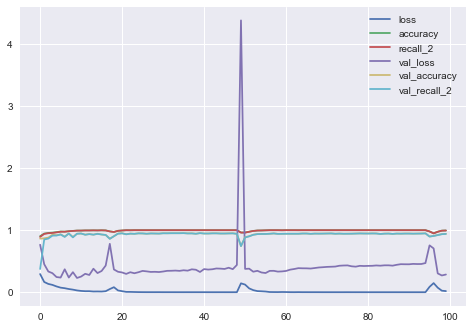

In [86]:
result_3.plot()

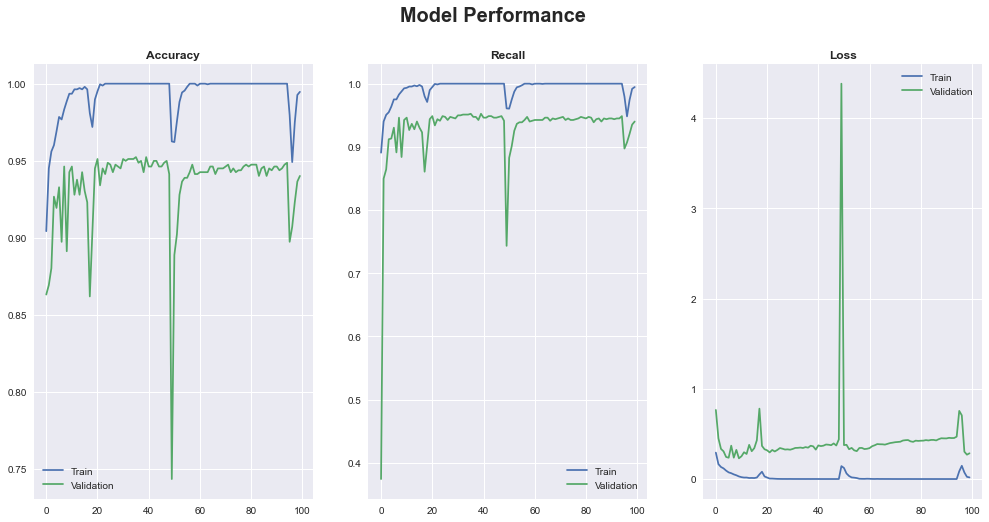

In [87]:
plot_result(result_3, 'recall_2', 'val_recall_2')